In [ ]:
!pip install -q plotly ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Markdown
import os


In [ ]:
# Path to your file
DATA_PATH = "/content/a2.csv"  # change if filename differs

df = pd.read_csv(DATA_PATH)
df.columns = [c.strip() for c in df.columns]

display(Markdown("## 1️⃣ Dataset Preview"))
display(df.head(10))

display(Markdown(f"**Rows:** {df.shape[0]} &nbsp;&nbsp; **Columns:** {df.shape[1]}"))


## 1️⃣ Dataset Preview

,id,date,country_name,alpha_3_code,country_code,sub_region,sub_region_code,hs_code,commodity,unit,value_qt,value_rs,value_dl
0,0,2015-01-01,American Samoa,ASM,16,Polynesia,61,71049000,*Othr Syn/Recnctrctd Prcs/Semi Prcs Stones,Kgs,1.96,37.08,0.06
1,1,2015-01-01,Australia,AUS,36,Australia and New Zealand,53,2044200,"Other Cuts Of Sheep With Bone In, Frozen",Kgs,1.04,14.47,0.02
2,3,2015-01-01,Australia,AUS,36,Australia and New Zealand,53,4090000,Natural Honey,Kgs,7.56,13.38,0.02
3,4,2015-01-01,Australia,AUS,36,Australia and New Zealand,53,7131000,*Peas (Pisum Sativum) Dried And Shld,Kgs,8900.59,2370.22,3.81
4,5,2015-01-01,Australia,AUS,36,Australia and New Zealand,53,7132000,*Chickpeas (Garbanzos) Dried And Shld,Kgs,34058.36,11093.32,17.83
5,6,2015-01-01,Australia,AUS,36,Australia and New Zealand,53,7133100,"*Beans Of The Spp Vigna Mungo,Hepper Or Vigna ...",Kgs,120.00,97.52,0.16
6,7,2015-01-01,Australia,AUS,36,Australia and New Zealand,53,7134000,"Lentils (Mosur),Dried And Shld",Kgs,3195.20,1605.62,2.58
7,9,2015-01-01,Australia,AUS,36,Australia and New Zealand,53,8092100,Sour Cherries (Prunus Cerasus),Kgs,8.57,35.14,0.06
8,12,2015-01-01,Australia,AUS,36,Australia and New Zealand,53,8094000,"Plums And Sloes , Fresh",Kgs,1.35,3.14,0.01
9,13,2015-01-01,Australia,AUS,36,Australia and New Zealand,53,10019910,Wheat,Kgs,2044.84,424.89,0.68


**Rows:** 52749 &nbsp;&nbsp; **Columns:** 13

In [ ]:
display(Markdown("## 2️⃣ Basic Summary"))

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
if missing.sum() == 0:
    display(Markdown("_No missing values detected._"))
else:
    display(Markdown("### Columns with missing values"))
    display(missing[missing > 0])

# Data types
display(Markdown("### Data Types"))
display(df.dtypes)

# Numeric summary
numeric = df.select_dtypes(include=[np.number])
if not numeric.empty:
    display(Markdown("### Numeric Summary"))
    display(numeric.describe())
else:
    display(Markdown("_No numeric columns detected._"))

# Categorical summary
categorical = df.select_dtypes(include=['object','category'])
if not categorical.empty:
    display(Markdown("### Categorical Columns (sample)"))
    for col in categorical.columns[:5]:
        print(f"{col} → {df[col].nunique()} unique | sample: {df[col].dropna().unique()[:5]}")


## 2️⃣ Basic Summary

_No missing values detected._

### Data Types

,0
id,int64
date,object
country_name,object
alpha_3_code,object
country_code,int64
sub_region,object
sub_region_code,int64
hs_code,int64
commodity,object
unit,object


### Numeric Summary

,id,country_code,sub_region_code,hs_code,value_qt,value_rs,value_dl
count,52749.000000,52749.000000,52749.000000,5.274900e+04,5.274900e+04,5.274900e+04,52749.000000
mean,45384.761853,170.553243,53.128552,5.673781e+07,4.031700e+05,1.860984e+03,2.695558
std,26495.064631,231.765462,0.845873,2.688934e+07,2.218177e+07,2.311719e+04,31.510836
min,0.000000,16.000000,53.000000,1.012910e+06,1.000000e-02,4.000000e-02,0.010000
25%,22272.000000,36.000000,53.000000,3.304999e+07,2.700000e-01,9.010000e+00,0.010000
50%,45291.000000,36.000000,53.000000,5.407829e+07,3.900000e+00,2.651000e+01,0.040000
75%,68357.000000,540.000000,53.000000,8.473500e+07,7.117000e+01,1.055200e+02,0.160000
max,91552.000000,882.000000,61.000000,9.804900e+07,2.623612e+09,1.145176e+06,1481.100000


### Categorical Columns (sample)

date → 123 unique | sample: ['2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01']
country_name → 27 unique | sample: ['American Samoa' 'Australia' 'Fiji' 'French Polynesia' 'Nauru']
alpha_3_code → 27 unique | sample: ['ASM' 'AUS' 'FJI' 'PYF' 'NRU']
sub_region → 4 unique | sample: ['Polynesia' 'Australia and New Zealand' 'Melanesia' 'Micronesia']
commodity → 3021 unique | sample: ['*Othr Syn/Recnctrctd Prcs/Semi Prcs Stones'
 'Other Cuts Of Sheep With Bone In, Frozen' 'Natural Honey'
 '*Peas (Pisum Sativum) Dried And Shld'
 '*Chickpeas (Garbanzos) Dried And Shld']


In [ ]:
display(Markdown("## 3️⃣ Detect Date Columns"))

date_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            parsed = pd.to_datetime(df[col], infer_datetime_format=True, errors='coerce')
            if parsed.notna().sum() >= len(df[col]) * 0.2:
                df[col] = parsed
                date_cols.append(col)
        except:
            pass

if date_cols:
    display(Markdown("**Detected Date Columns:** " + ", ".join(date_cols)))
else:
    display(Markdown("_No clear date columns detected._"))


## 3️⃣ Detect Date Columns

/tmp/ipython-input-4085020586.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(df[col], infer_datetime_format=True, errors='coerce')
/tmp/ipython-input-4085020586.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(df[col], infer_datetime_format=True, errors='coerce')
/tmp/ipython-input-4085020586.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datet

**Detected Date Columns:** date

In [ ]:
display(Markdown("## 4️⃣ Interactive Dashboard "))

# Identify column types
all_columns = df.columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Default column selections
x_col = numeric_cols[0] if numeric_cols else all_columns[0]
y_col = numeric_cols[1] if len(numeric_cols) > 1 else numeric_cols[0]
group_col = cat_cols[0] if cat_cols else None

# --- Generate different chart types ---
figures = []

# Scatter Plot
figures.append({
    "name": "Scatter Plot",
    "figure": px.scatter(df, x=x_col, y=y_col, color=group_col,
                         title=f"Scatter Plot: {x_col} vs {y_col}", template="plotly_white")
})

# Line Chart
figures.append({
    "name": "Line Chart",
    "figure": px.line(df, x=x_col, y=y_col, color=group_col,
                      title=f"Line Chart: {x_col} vs {y_col}", template="plotly_white")
})

# Bar Chart
figures.append({
    "name": "Bar Chart",
    "figure": px.bar(df, x=x_col, y=y_col, color=group_col,
                     title=f"Bar Chart: {x_col} vs {y_col}", template="plotly_white")
})

# Histogram
figures.append({
    "name": "Histogram",
    "figure": px.histogram(df, x=x_col, color=group_col,
                           title=f"Histogram of {x_col}", nbins=40, template="plotly_white")
})

# Box Plot
figures.append({
    "name": "Box Plot",
    "figure": px.box(df, x=group_col, y=y_col, color=group_col,
                     title=f"Box Plot of {y_col} by {group_col}", template="plotly_white")
})

# Pie Chart (only if categorical + numeric)
if cat_cols and numeric_cols:
    figures.append({
        "name": "Pie Chart",
        "figure": px.pie(df, names=cat_cols[0], values=numeric_cols[0],
                         title=f"Pie Chart: {cat_cols[0]} vs {numeric_cols[0]}", template="plotly_white")
    })

# --- Create a base figure with dropdown ---
base_fig = go.Figure()

# Add all chart traces but keep all invisible except first
for i, chart in enumerate(figures):
    for trace in chart["figure"].data:
        trace.visible = (i == 0)
        base_fig.add_trace(trace)

# Dropdown menu
buttons = []
for i, chart in enumerate(figures):
    visibility = [False] * len(base_fig.data)
    start = sum(len(f["figure"].data) for f in figures[:i])
    end = start + len(chart["figure"].data)
    for j in range(start, end):
        visibility[j] = True
    buttons.append({
        "label": chart["name"],
        "method": "update",
        "args": [{"visible": visibility}, {"title": chart["figure"].layout.title.text}]
    })

base_fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "showactive": True,
        "x": 0.15,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top"
    }],
    title="Interactive Data Dashboard",
    template="plotly_white"
)

base_fig.show()


## 4️⃣ Interactive Dashboard 

## 5️⃣ Correlation Heatmap

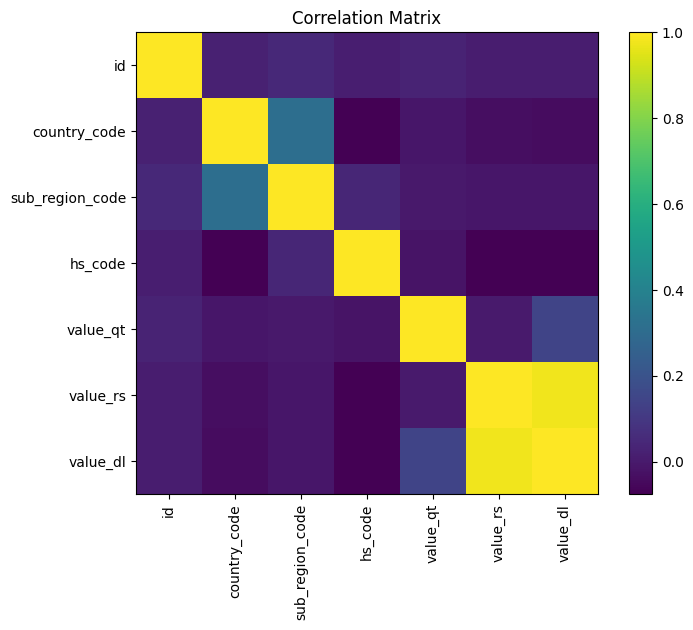

In [ ]:
display(Markdown("## 5️⃣ Correlation Heatmap"))

if numeric.shape[1] >= 2:
    corr = numeric.corr()
    plt.figure(figsize=(8,6))
    plt.imshow(corr, interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation Matrix")
    plt.show()
else:
    display(Markdown("_Not enough numeric columns._"))


In [ ]:
display(Markdown("## 6️⃣ Automated Decision Insights"))

insights = []

if date_cols and numeric_cols:
    insights.append(f"Use {date_cols[0]} to analyze time trends of numeric features like {numeric_cols[0]}.")
low_cardinality = [c for c in cat_cols if df[c].nunique() <= 20]
if low_cardinality:
    insights.append(f"Columns suitable for segmentation: {', '.join(low_cardinality)}")
if numeric_cols:
    col0 = numeric_cols[0]
    q1, q3 = df[col0].quantile([0.25,0.75])
    iqr = q3 - q1
    outlier_frac = ((df[col0] < (q1 - 1.5*iqr)) | (df[col0] > (q3 + 1.5*iqr))).mean()
    insights.append(f"{col0} has {outlier_frac*100:.2f}% outliers (IQR rule). Check anomalies.")

for i in insights:
    display(Markdown("- " + i))


## 6️⃣ Automated Decision Insights

- Use date to analyze time trends of numeric features like id.

- Columns suitable for segmentation: sub_region, unit

- id has 0.00% outliers (IQR rule). Check anomalies.